In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf
from skimage.transform import resize
from graphviz import Graph, render
from utils.netviz import NetViz
from utils.mnistutil import MNISTUitl

Using TensorFlow backend.
/Users/mislam/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(28, 28)
(7, 7)


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


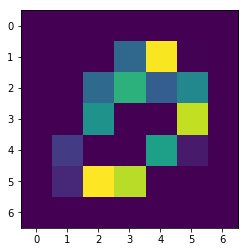

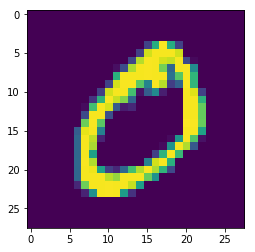

In [2]:
(A, Ay), (B, By) = mnist.load_data()
x = A[1]
print(x.shape)
xr = resize(x, (7, 7))
print(xr.shape)
plt.imshow(xr)
plt.show()
plt.imshow(x)
plt.show()

In [4]:
from utils.netviz import NetViz
mn = MNISTUitl()
viz = NetViz()

'Hello'

In [6]:
a = 0
b = 1
X, Y, x, y = mn.getdata(a,b,7,7)
y[y == a] = 0
Y[Y == a] = 0
y[y == b] = 1
Y[Y == b] =1
print(Y[0:100])
print(X.shape,x.shape,x.shape,y.shape)

[0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1]
(12665, 7, 7) (2115, 7, 7) (2115, 7, 7) (2115,)


In [7]:
nm , xt, yt = mn.train(X, Y, x,y,7,7,2)

x_train shape: (12665, 7, 7, 1)
(12665, 7, 7, 1) 12665 train samples (12665,)
2115 test samples
(12665,) (12665,)
Epoch 1/10
12665/12665 [==============================] - 0s 28us/step - loss: 0.6841 - acc: 0.5316
Epoch 2/10
12665/12665 [==============================] - 0s 24us/step - loss: 0.6487 - acc: 0.6730

In [37]:
w, b = nm.layers[1].get_weights()
print(w.shape)
wp = np.where(w   > 0 )
wn = np.where(w   < 0 )
print(len(wn[0]),len(wp[0]))

(49, 7)
142 201


In [433]:
print(nm.predict(xt[1:2]),yt[1:2])

[[ 0.83442575  0.16557422]] [0]


In [434]:
x1 = xt[ 5:6]
y1 = yt[5:6]
print(x.shape)
#dot, A = vispredictpydot(nm,x1,y1,7,7)
#dot

(2115, 7, 7)


[1]
(28, 28)
(49, 7)
0.0038985 0.257112 0.85887
(7,)  Here
0.0198193 -0.0176227 MINMAX W
0.992203 -0.797153 MINMAX W
{'p0', 'n4', 'n3', 'n1', 'p4', 'p2', 'n5', 'p3', 'n0', 'n2', 'p1'} {'n4', 'n5', 'n0'}
[[ 0.14113     0.85886997]] [1]


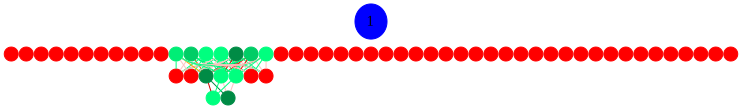

In [443]:
s = 19
e = 20
#for i in range(len(yt) -1):
#    p = nm.predict(xt[i:i+1])
#    l = yt[i:i + 1]
#    print(p)
#    if l == 1 and p[0][0] > p[0][1]:
#        s = i
#        e = i + 1
#        break
x1 = xt[ s:e]
y1 = yt[ s:e]
print(y1)
print(x.shape)
print(viz)
dot, A, g = viz.vispredict(nm,x1,y1,7,7)
print(nm.predict(x1),y1)
dot

In [354]:
dot.render('onewn.gv')

'onewn.gv.png'

In [355]:
nm.layers[2].get_weights()

[array([[-4.15694714,  4.06951571],
        [ 4.42571211, -4.60194683],
        [-0.28843206, -0.2856093 ],
        [-0.06935339,  0.68761432],
        [ 0.71125418, -0.68009388],
        [-3.41580367,  4.67968941],
        [-0.20845467,  0.6573624 ]], dtype=float32),
 array([ 0.03758882, -0.03758868], dtype=float32)]

In [309]:
v = -0.22682077*0.109194 + -0.59449071*0.112141 + 0.545078
print(v)

0.45364375013050995


[1]
(2115, 7, 7)
(49, 7)
0.00379085 0.296432 0.91083
(7,)  Here
0.0168302 -0.0176323 MINMAX W
1.04527 -1.06244 MINMAX W
{'p0', 'n5', 'p2', 'n3', 'p4', 'n0', 'p1', 'n2', 'n1', 'n4'} {'n0', 'n5', 'n4'}
[[ 0.08916954  0.91083044]] [1]


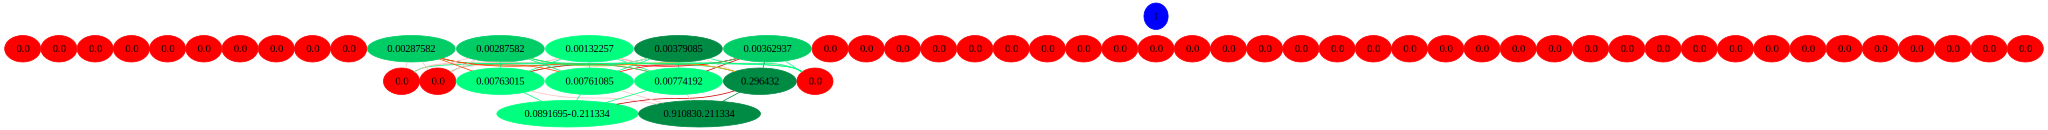

In [38]:
s = 8
e = 9
x1 = xt[ s:e]
y1 = yt[ s:e]
print(y1)
print(x.shape)
dot8, A = viz.vispredictwithlabel(nm,x1,y1,7,7)
print(nm.predict(x1),y1)
dot8

In [357]:
dot.body

['\tedge [bgcolor="purple:pink" color=yellow nodesep=0]',
 '\tgraph [nodesep=0 ranksep=0]',
 '\tI [label=1 color=blue height=0.2 style=filled width=0.2]',
 '\tx_0 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_1 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_2 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_3 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_4 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_5 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_6 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_7 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_8 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_9 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_10 [label=0.0 color=red height=0.2 style=filled width=0.2]',
 '\tx_11 [label=0.00358324 color=springgreen3 fillcolor=springgreen3 height=0.2 style=filled width=0.2]',
 '\tx_12 [la

In [360]:
dot.render('oner.gv')

'oner.gv.png'

(49, 7)
0.00379085 4.84743 4.81333
(7,)  Here
4.84743 -4.89315 MINMAX W
4.81333 -5.3559 MINMAX W
{'p0', 'n4', 'p4', 'p2', 'n5', 'p3', 'n0', 'p1'} {'n5', 'n4', 'n3', 'n0'}


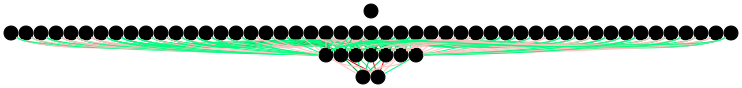

In [422]:
dots , As = viz.vispredictwights(nm,x1,y1,7,7)
dots

In [400]:
dots.render('staticr.gv')

'staticr.gv.png'

(49, 7)
0.00311034 0.296467 0.914339
(7,)  Here
0.0127216 -0.0144176 MINMAX W
1.0454 -1.06256 MINMAX W
{'p0', 'n5', 'p2', 'p4', 'n0', 'p3', 'n2', 'p1', 'n1', 'n4'} {'n0', 'n5', 'n4'}


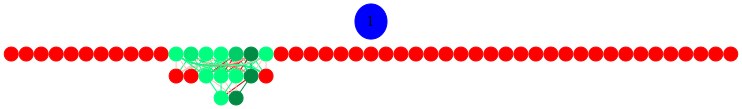

In [40]:
s = 0
e = 1
x1 = xt[ s:e]
y1 = yt[ s:e]
dot8, A, G = viz.vispredict(nm,x1,y1,7,7)
dot8

In [41]:
G.visit()
# IN37->L1N3->ON0-> For 0
# IN31->L1N1->ON1-> For 1
print(G.getPath())

('x1_1', 0.29646701) ('x2_1', 0.91433924) 0 MAF
IN11->L1N1->ON1->


In [374]:
nm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 49)                0         
_________________________________________________________________
H (Dense)                    (None, 7)                 350       
_________________________________________________________________
output (Dense)               (None, 2)                 16        
Total params: 366
Trainable params: 366
Non-trainable params: 0
_________________________________________________________________


In [370]:
dot8.render('zeronew.gv')

'zeronew.gv.png'

In [15]:
print(dot8)

graph {
	edge [bgcolor="purple:pink" color=yellow nodesep=0]
	graph [nodesep=0 ranksep=0]
	I [label=0 color=blue height=0.2 style=filled width=0.2]
	x_0 [label="" color=red height=0.2 style=filled width=0.2]
	x_1 [label="" color=red height=0.2 style=filled width=0.2]
	x_2 [label="" color=red height=0.2 style=filled width=0.2]
	x_3 [label="" color=red height=0.2 style=filled width=0.2]
	x_4 [label="" color=red height=0.2 style=filled width=0.2]
	x_5 [label="" color=red height=0.2 style=filled width=0.2]
	x_6 [label="" color=red height=0.2 style=filled width=0.2]
	x_7 [label="" color=red height=0.2 style=filled width=0.2]
	x_8 [label="" color=red height=0.2 style=filled width=0.2]
	x_9 [label="" color=red height=0.2 style=filled width=0.2]
	x_10 [label="" color=springgreen3 fillcolor=springgreen3 height=0.2 style=filled width=0.2]
	x_11 [label="" color=springgreen3 fillcolor=springgreen3 height=0.2 style=filled width=0.2]
	x_12 [label="" color=red height=0.2 style=filled width=0.2]
	x_13

[]
(2115, 7, 7)
(49, 128)
0.00359093 0.220274 0.971782
(128,)  Here
0.00196071 -0.00315529 MINMAX W
0.114725 -0.0826673 MINMAX W
{'p0', 'n4', 'n3', 'n1', 'p4', 'p2', 'n5', 'p3', 'n0', 'n2', 'p1'} {'n4', 'n3', 'n1', 'n5', 'n0', 'n2'}


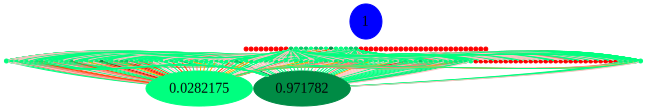

In [192]:
x1 = xt[3:4]
y1 = yt[3:3]
print(y1)
print(x.shape)
dot, A = vispredict(nm,x1,y1,7,7)
dot

In [139]:
dot.render('zero.dot')

'/Users/mislam/Desktop/mlpl/Network slicing/zero.dot.png'

In [46]:
a = [0, 0]
if (y1 == np.array(a)).all():
    print("One")
else:
    print("False")

False


In [26]:
zeros = []
count = 0
print(yt)
for i in range(len(yt)):
    if yt[i] == [0 1]:
        zeros.append((xt[i:i+1], yt[i:i+1]))
        count += 1
        if count == 5:
            break
ones = [] 
count = 0
for i in range(len(yt)):
    if yt[i] == [1 0]:
        ones.append((xt[i:i+1], yt[i:i+1]))
        count += 1
        if count == 5:
            break

SyntaxError: invalid syntax (<ipython-input-26-1785f4bd945a>, line 5)

In [11]:
for i in range(0,len(zeros)):
    x, y = zeros[i]
    print(x.shape)
    dot, A = vispredict(nm,x,y)
    print(A)
    dot.render('C:/Users/johir/Desktop/mlpl/NetworkSlice/zero{0}'.format(i))
    #render('dot', 'png', 'C:/Users/johir/Desktop/mlpl/NetworkSlice/zero{0}.gv'.format(i))
for i in range(0,len(ones)):
    x, y = ones[i]
    print(x.shape)
    dot, A = vispredict(nm,x,y)
    print(A)
    dot.render('C:/Users/johir/Desktop/mlpl/NetworkSlice/one{0}'.format(i))

NameError: name 'zeros' is not defined

In [128]:
import pygraphviz as pgv
G = pgv.AGraph("one.gv")

In [129]:
G

<AGraph <Swig Object of type 'Agraph_t *' at 0x18238cc330>>

In [131]:
G.layout(prog = "dot")
G.draw('file.png')

/Users/mislam/anaconda/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: Could not load "/Users/mislam/anaconda/lib/graphviz/libgvplugin_pango.6.dylib" - file not found

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/Users/mislam/anaconda/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: Could not load "/Users/mislam/anaconda/lib/graphviz/libgvplugin_pango.6.dylib" - file not found

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


In [140]:
import networkx as nx
from networkx.drawing.nx_pydot import read_dot
G = nx.Graph(read_dot("zero.dot"))

In [135]:
G

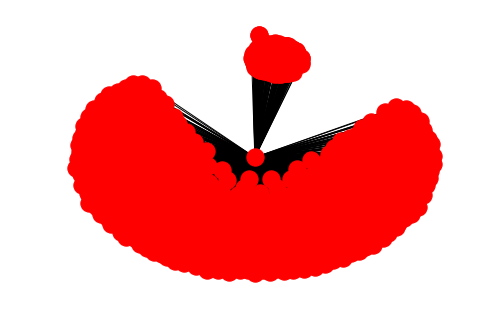

In [142]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

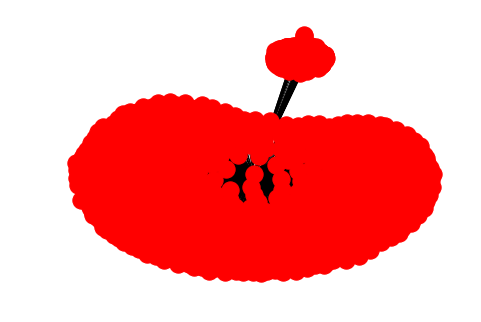

In [137]:
import networkx as nx
from networkx.drawing.nx_pydot import read_dot
G = nx.Graph(read_dot("zero.gv"))
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

In [292]:
import pydot as pt
def vispredictpydot(nm, x, y):
    w1,b1 = nm.layers[1].get_weights()
    w2,b2 = nm.layers[2].get_weights()
    W1 = np.vstack([w1])
    X = x.reshape(784,)
    X1 = np.dot(X,W1)
    X1 = np.add(X1, b1)
    X1[X1<0]=0
    W2 = np.vstack([w2])
    X2 = np.dot(X1,W2)
    X2 = np.add(X2,b2)
    X2 = softmax(X2)
    dot = pt.Dot(graphtype = "graph")
    #dot.attr(bgcolor='purple:pink', kw = "edge", style = "invis",nodesep = "0")
    #dot.attr(bgcolor='purple:pink', kw = "edge", color = "yellow",nodesep = "0")
    #dot.attr(kw = "graph", nodesep = "0", ranksep = "0")
    
    color = ["red","green"]
    green = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgep = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgen = ["rosybrown1", "salmon", "orange", "orangered", "red", "red3"]
    node = pt.Node('I',str(getLabel(y)),color = "blue",style = "filled",**{'width':str(.2), 'height':str(.2)})
    dot.add_node(node)
    maxa = np.amax(X)
    maxc = np.amax(X1)
    maxd = np.amax(X2)
    print(maxa,maxc,maxd)
    A = []
    s = 0.05
    
    
    for i in range(X.shape[0]):
        if X[i] > 0:
            ind = int((X[i])//(maxa/4))
            #print(ind,X[i])
            c = green[ind]
            node = pt.Node('x_'+str(i), '', color = c,fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
        else :
            node = pt.Node('x_'+str(i), '', color = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
    E = []
    total = 0
    for j in range(X.shape[0]):
        total += 1
        #if X[j] > 0:
        #E.append(('I','x_'+str(j))) # May need uncommenting
        e = pt.Edge('I','x_'+str(j), style ="invis")
        dot.add_edge(e)
        

    #print(len(E),total,100*len(E)/total)
    #A.append(100*len(E)/total)
    #dot.edges(E) # My need uncommenting
    for i in range(X1.shape[0]):
        if X1[i] > 0:
            ind = int((X1[i])//(maxc/4))
            c = green[ind]
            node = pt.Node('x1_'+str(i), '', color = c, fillcolor = c,style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
        else :
            node = pt.Node('x1_'+str(i), '', color = color[0], fillcolor = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
    E1 = []
    total = 0
    print(X1.shape," Here")
    minw = 0
    maxw = -1
    indices1 = []
    
    # Getting max w phase
    for j in range(X1.shape[0]):
        for i in range(X.shape[0]):
            if X[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W1[i][j], X[i]) + b1[i]
                maxw = max(maxw,w)
                minw = min(w, minw)
                sw = w *255
    
    for j in range(X1.shape[0]):
        for i in range(X.shape[0]):
            total += 1
            if X[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W1[i][j], X[i])
                sw = w *255 + b1[i]
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    e = pt.Edge('x_'+str(i),'x1_'+str(j), color = c)
                    dot.add_edge(e)
                    indices1.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw * 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    e = pt.Edge('x_'+str(i),'x1_'+str(j), color = c)
                    dot.add_edge(e)
                    indices1.append("p{}".format(ind))
    # Adding edges
    #print(len(E1),total,100*len(E1)/total)
    print(maxw, minw, "MINMAX W")
    A.append(100*len(E1)/total)
    #dot.edges(E1) # May need uncommenting
    for i in range(X2.shape[0]):
        if X2[i] > 0:
            ind = int((X2[i])//(maxd/4))
            c = green[ind]
            node = pt.Node('x2_'+str(i), str(X2[i]), color = c, fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
        else :
            node = pt.Node('x2_'+str(i), str(X2[i]), color = color[0], fillcolor = color[0],style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
    E2 = []
    total = 0
    minw = 0
    maxw = -1
    for j in range(X2.shape[0]):
        for i in range(X1.shape[0]):
            if X1[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W2[i][j], X1[i]) + b2[i]
                maxw = max(maxw,w) 
                minw = min(w, minw)
                sw = w *255
        
    indices2 = []
    for j in range(X2.shape[0]):
        for i in range(X1.shape[0]):
            total += 1
            if X1[i] > 0:
                w = np.multiply(W2[i][j], X1[i]) + b2[i]
                sw = w *255
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    e = pt.Edge('x1_'+str(i),'x2_'+str(j),color = c)
                    dot.add_edge(e)
                    indices2.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw* 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    e = pt.edge('x1_'+str(i),'x2_'+str(j),color = c)
                    dot.add_edge(e)
                    indices2.append("n{}".format(ind))

                #E2.append(('x1_'+str(i),'x2_'+str(j))) # To be uncommented if needed 
    #print(len(E2), total, 100*len(E2)/total)
    print(maxw, minw, "MINMAX W")
    indices1 = set(indices1)
    indices2 = set(indices2)
    print(indices1, indices2)
    A.append(100*len(E2)/total)
    #dot.edges(E2) # To be uncommented if needed 
    return dot, A

In [32]:
nm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
H (Dense)                    (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
